In [17]:
#Question 1

In [18]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [19]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [20]:
#Step 4. Discover what is the mean age per occupation
print(users.groupby('occupation').mean().age.round(2))

occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64


In [21]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
print(users.groupby('occupation').gender.value_counts().loc[:,'M']/users.groupby('occupation').gender.count().round(2).sort_values(ascending=False))

occupation
administrator    0.544304
artist           0.535714
doctor           1.000000
educator         0.726316
engineer         0.970149
entertainment    0.888889
executive        0.906250
healthcare       0.312500
homemaker        0.142857
lawyer           0.833333
librarian        0.431373
marketing        0.615385
none             0.555556
other            0.657143
programmer       0.909091
retired          0.928571
salesman         0.750000
scientist        0.903226
student          0.693878
technician       0.962963
writer           0.577778
Name: gender, dtype: float64


In [22]:
#Step 6. For each occupation, calculate the minimum and maximum ages
print(users.groupby('occupation').age.agg([min, max]))

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [23]:
#Step 7. For each combination of occupation and sex, calculate the mean age
print(users.groupby(['occupation', 'gender']).age.mean().round(2))

occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
               M         62.54
salesman       F 

In [24]:
#Step 8. For each occupation present the percentage of women and men
print(round((users.groupby('occupation').gender.value_counts().loc[:,'F']/users.groupby('occupation').gender.count())*100, 2))

occupation
administrator    45.57
artist           46.43
doctor             NaN
educator         27.37
engineer          2.99
entertainment    11.11
executive         9.38
healthcare       68.75
homemaker        85.71
lawyer           16.67
librarian        56.86
marketing        38.46
none             44.44
other            34.29
programmer        9.09
retired           7.14
salesman         25.00
scientist         9.68
student          30.61
technician        3.70
writer           42.22
Name: gender, dtype: float64


In [25]:
#Question 2

In [26]:
#Step 1. Import the necessary libraries
import pandas as pd

In [27]:
filename = 'Euro_2012_stats_TEAM.csv'

In [28]:
with open(filename, 'r') as file:
    # Step 3. Assign it to a variable called euro12
    euro12 = pd.read_csv(file)

In [29]:
# Step 4. Select only the Goal column
print(euro12['Goals'])

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [30]:
# Step 5. How many team participated in the Euro2012?
num_teams = len(euro12.groupby('Team').groups)
print(num_teams)

16


In [31]:
# Step 6. What is the number of columns in the dataset?
cols = euro12.shape[1]
print(cols)

35


In [32]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [33]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print(discipline)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [34]:
# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = discipline.groupby('Team').agg({'Yellow Cards': 'mean'})
print(mean_yellow_cards_per_team)

                     Yellow Cards
Team                             
Croatia                       9.0
Czech Republic                7.0
Denmark                       4.0
England                       5.0
France                        6.0
Germany                       4.0
Greece                        9.0
Italy                        16.0
Netherlands                   5.0
Poland                        7.0
Portugal                     12.0
Republic of Ireland           6.0
Russia                        6.0
Spain                        11.0
Sweden                        7.0
Ukraine                       5.0


In [35]:
filtered = euro12[euro12["Goals"]>6]["Team"]
print("Teams having number of goals greater than 6 are"," and ".join(list(filtered)))

Teams having number of goals greater than 6 are Germany and Spain


In [36]:
G_teams=euro12[euro12["Team"].str.startswith('G')]["Team"]
print("Teams having starting letter G are"," and ".join(list(G_teams)))

Teams having starting letter G are Germany and Greece


In [37]:
print(euro12.iloc[:,:7])

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [38]:
print(euro12.iloc[:,:-3])

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [39]:
euro12=euro12.set_index("Team")

In [40]:
print(euro12[(euro12.index == "England") | (euro12.index == "Italy") | (euro12.index == "Russia" )]["Shooting Accuracy"])

Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object


In [41]:
#Question3
import pandas as pd
import random

In [42]:
n1 = [[random.randint(1,4)]for i in range(100)]
x = pd.DataFrame(n1)
n2 = [[random.randint(1,3)]for i in range(100)]
y = pd.DataFrame(n2)
n3 = [[random.randint(10000,30000)]for i in range(100)]
z = pd.DataFrame(n3)

In [43]:
Series=pd.concat([x,y,z],axis=1)
Series.columns=['First','Second','Third']
Series

,First,Second,Third
0,1,2,18445
1,4,3,25304
2,2,2,13767
3,4,1,22857
4,4,3,20531
...,...,...,...
95,3,3,19203
96,4,1,21327
97,3,3,13660
98,2,2,19663


In [44]:
Series.columns=['bedrs','bathrs','price_sqr_meter']
Series

,bedrs,bathrs,price_sqr_meter
0,1,2,18445
1,4,3,25304
2,2,2,13767
3,4,1,22857
4,4,3,20531
...,...,...,...
95,3,3,19203
96,4,1,21327
97,3,3,13660
98,2,2,19663


In [45]:
bigcol=pd.concat([x,y,z])
bigcol.columns=['bigcolumn']
bigcol

,bigcolumn
0,1
1,4
2,2
3,4
4,4
...,...
95,19203
96,21327
97,13660
98,19663


In [46]:
bigcol.reset_index()

,index,bigcolumn
0,0,1
1,1,4
2,2,2
3,3,4
4,4,4
...,...,...
295,95,19203
296,96,21327
297,97,13660
298,98,19663


In [47]:
#Question4
import numpy as np
import pandas as pd
import datetime

In [48]:
filename = 'wind.csv'

In [49]:
data=pd.read_csv('wind.csv',sep="\s+",parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [50]:
def fix_century(x):
  year=x.year-100 if x.year > 1979 else x.year
  return datetime.date(year,x.month,x.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [51]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [52]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [53]:
data.shape[0]-data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [54]:
data.mean().mean()

10.227982360836924

In [55]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [56]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [57]:
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_winds=data.query('month==1')
january_winds
january_winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [58]:
print( "Yearly:\n", data.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [59]:
print ("Monthly:", data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Yr_Mo_Dy                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

In [60]:
print ("Weekly:", data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Yr_Mo_Dy                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

In [61]:
df_1961 = data[data.index < pd.to_datetime('1962-01-01')]
df_1961.resample('W').mean()
df_1961.resample('W').min()
df_1961.resample('W').max()
df_1961.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062,0.000000,0.0,2.160247
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355,0.000000,0.0,2.160247
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239,0.000000,0.0,2.160247
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721,0.000000,0.0,2.160247
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104,0.487950,0.0,13.483676
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705,0.000000,0.0,2.160247
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377,0.000000,0.0,2.160247
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283,0.000000,0.0,2.160247


In [62]:
#Question5

In [63]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [64]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [65]:
chipo['item_price'] = chipo['item_price'].str.replace('@', '')

In [66]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [67]:
chipo.shape[0]

4622

In [68]:
chipo.shape[1]

5

In [69]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [70]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [71]:
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [72]:
c = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [73]:
chipo.quantity.sum()

4972

In [74]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [75]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

39237.02

In [76]:
chipo.order_id.value_counts().count()

1834

In [77]:
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['item_price'].mean()

18.81142857142869

In [78]:
chipo.item_name.value_counts().count()

50

In [79]:
#Question6

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 0, 'Year')

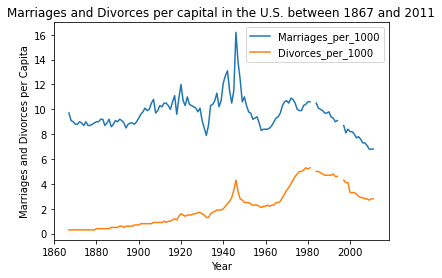

In [81]:
df = pd.read_csv('marriage.csv')
df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])
plt.title('Marriages and Divorces per capital in the U.S. between 1867 and 2011')
plt.ylabel('Marriages and Divorces per Capita')
plt.xlabel('Year')

In [82]:
#Question7

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
plt.figure(figsize=[15, 10])

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [85]:
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

In [86]:
X = np.arange(len(marriage))

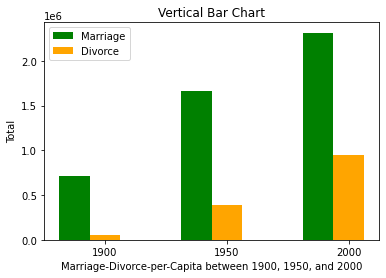

In [87]:
plt.bar(X, marriage, color = 'green', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'orange', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Vertical Bar Chart")
plt.xlabel('Marriage-Divorce-per-Capita between 1900, 1950, and 2000')
plt.ylabel('Total')
plt.show()

In [88]:
#Question8

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('actor_kill_counts.csv')

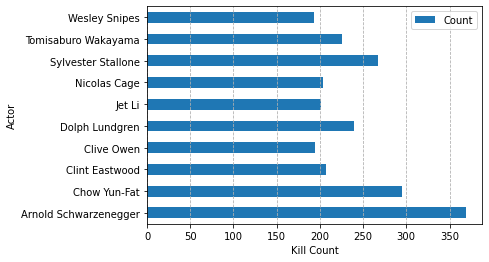

In [91]:
df.plot.barh(x='Actor', y='Count')
plt.ylabel('Actor')
plt.xlabel('Kill Count')
plt.grid(axis='x', linestyle = '--')
plt.show()

In [92]:
#Question9

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

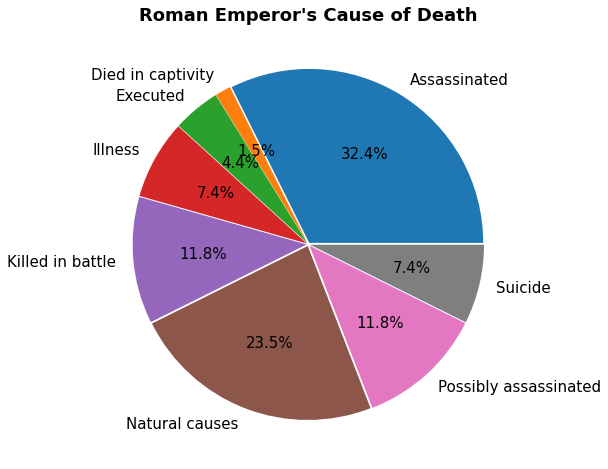

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
Emperor_killed=roman_emperors.groupby("Cause_of_Death")['Emperor'].count()
Emperor_killed.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", fontsize = 18, fontweight ='bold')

In [94]:
#Question10

In [95]:
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('lastquestion.csv')

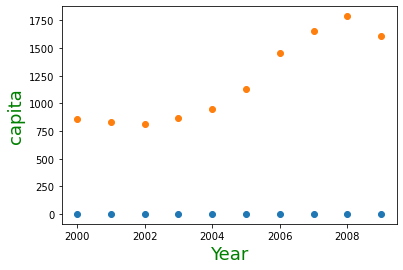

In [97]:
x=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]
ArcadeRevenue = [1.196,1.176,1.269,1.240,1.307,1.435,1.601,1.654,1.803,1.734]
ComputerScience = [861,830,809,867,948,1129,1453,1656,1787,1611]
plt.scatter(x,ArcadeRevenue,label='ArcadeRevenue')
plt.scatter(x,ComputerScience,label='ComputerScience')
plt.xlabel("Year",fontsize = 18, color='green')
plt.ylabel("capita",fontsize = 18, color='green')
plt.show()